# HW2 CMPE547
Mehmetcan Tütüncü



## Data loaded and visualized

   $x_0$  $x_1$
0  5.219  7.998
1  5.102  2.163
2  4.089  4.327
3  5.046  8.000
4  4.596  2.238


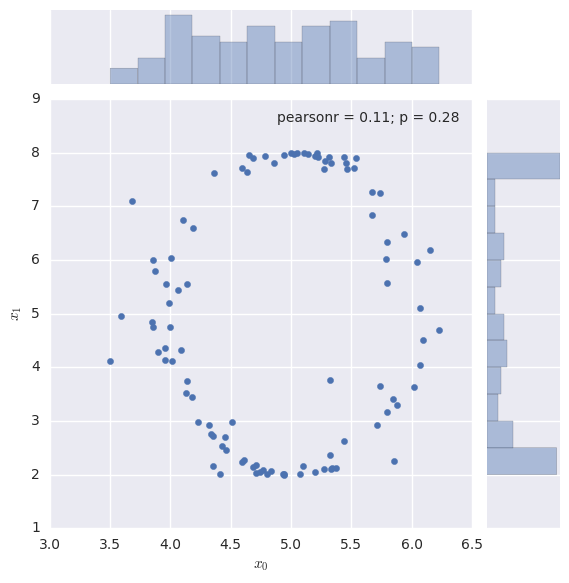

In [52]:
%matplotlib inline
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = np.loadtxt("data.txt",skiprows=1)
sns.set(color_codes= True )
df=pd.DataFrame(data,columns=[r'$x_0$',r'$x_1$'])
print(df.head())
sns.jointplot(x=r'$x_0$', y= r'$x_1$', data=df,marginal_kws=dict(bins=12))
plt.show()

# Model Proposal and Sampling

Marginal histogram of $x_1$ reminds me of $sin(X)$ variate where $X \sim U(0,2\pi)$ since the shape itself looks like an ellipse on 2D, it will be a fair guess to go with the generated model :
$$ X \sim U(0,2\pi) $$
$$ \epsilon_0 \sim N(0,\sigma_1^2)   ,   \epsilon_1 \sim N(0,\sigma_2^2)$$ 
$$ x_0 = cos(X)   + 5 +\epsilon_0$$
$$ x_1 = 3sin(X) + 5 + \epsilon_1 $$

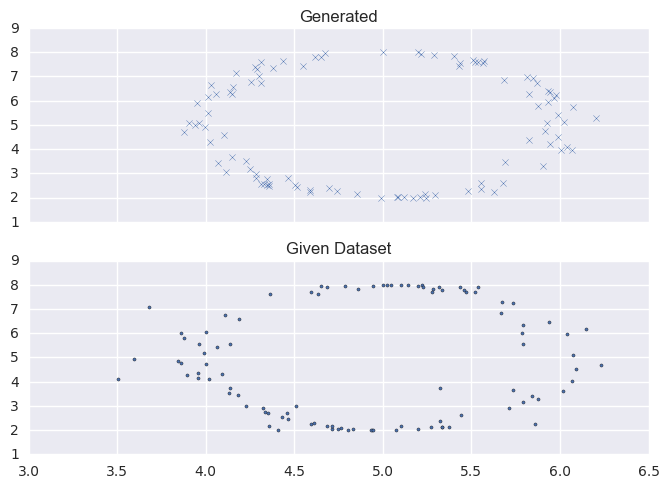

In [83]:
sampleSize=100
#sigma_1,2 is manually driven by trial/errors (not optimized by ML)
sigma_1=0.1  
sigma_2=0.03
X= np.random.uniform(0,2*np.pi,sampleSize)
epsilon_0 = np.random.normal(0,sigma_1,sampleSize)
epsilon_1 = np.random.normal(0,sigma_2,sampleSize)
x_0 = np.cos(X) + 5 + epsilon_0
x_1 = 3*np.sin(X) + 5 + epsilon_1
fig,(ax1,ax2) = plt.subplots(2,sharex=True,sharey=True)
ax1.set_title("Generated")
ax1.scatter(x_0,x_1,marker='x')
ax2.set_title("Given Dataset")
ax2.scatter(data[:,0],data[:,1],marker='.')
plt.show()


## Discussion

We can visually observe similarity by looking at 2D histograms of the given data.
As one can see below images, 2d grid structured histograms somehow resemble each other.

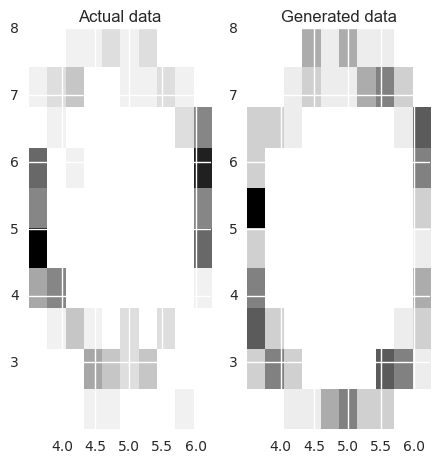

In [113]:
actualdata,xedges,yedges= np.histogram2d(x=data[:,0],y=data[:,1])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(131, title='Actual data')
plt.imshow(actualdata, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax2= fig.add_subplot(132,title = 'Generated data')
gendata,genxedges,genyedges = np.histogram2d(x=x_0,y=x_1)
plt.imshow(gendata, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

